In [1]:
%pip install --upgrade pip --quiet
%pip install numpy --quiet
%pip install matplotlib --quiet
%pip install plotly --quiet
%pip install ipywidgets --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal, Tuple
from collections.abc import Callable

And you can combine plots on one figure, i.e. plot multiple lines and or scatters etc. You just only have to do them line by line before the `plt.show()` command, which basically closes the canvas.
# Task 1
1. Plot multiple datasets sets now. you can use the arrays I give you down, or create your own.
2. One of the lines have to be scatter plot with lines as well, the second is line only, the third is scatter only. The first set has to be red, with black marker edges, the second should be orange, the third should be magenta.
3. Give labels to the data. Don't forget to call `plt.legend()` to make them visible.
4. Look up in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) how to move the legends to an arbitrary place. Move the legend below the figure, centered, outside the canvas.

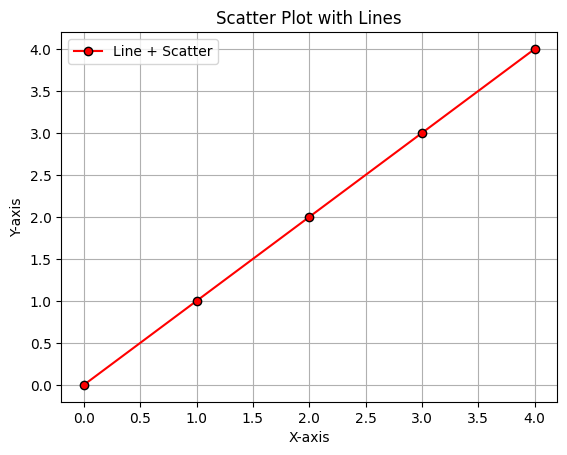

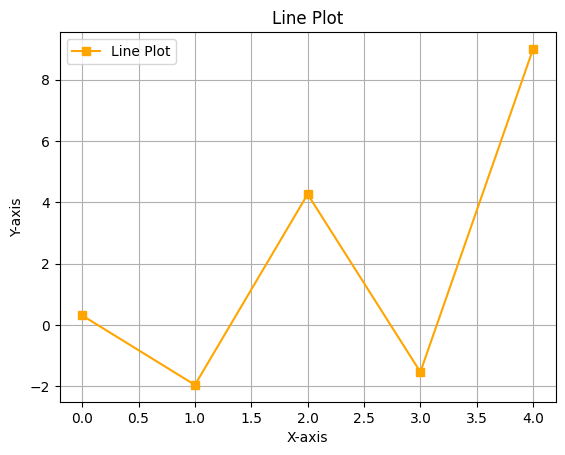

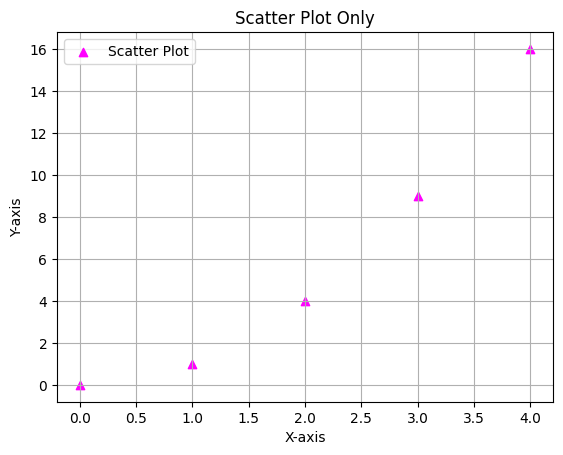

In [22]:
# Data
x1 = np.arange(5)
y1 = np.arange(5)

x2 = np.arange(5)
y2 = np.arange(5) + np.random.uniform(-5, 5, 5)

x3 = np.arange(5)
y3 = np.arange(5) ** 2


# 1. Scatter plot with lines, red with black marker edges
plt.plot(x1, y1, marker='o', color='red', markeredgecolor='black', label='Line + Scatter')
plt.title('Scatter Plot with Lines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

# 2. Line plotm, orange
plt.plot(x2, y2, marker='s', color='orange', label='Line Plot')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

# 3. Scatter plot only, magenta
plt.scatter(x3, y3, marker='^', color='magenta', label='Scatter Plot')
plt.title('Scatter Plot Only')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

# Task 2

Write a function with `my_poly_plotter(n,x)` that plots the polynomials $p_k(x)=x^k$ for $k=1,\ldots,n$. 
Make sure your plot has axis labels and a title and the curves are labeled. The curve labels should be $k=\text{degree of polynomial}$ for each line.

Make a plot for $k = 5$!

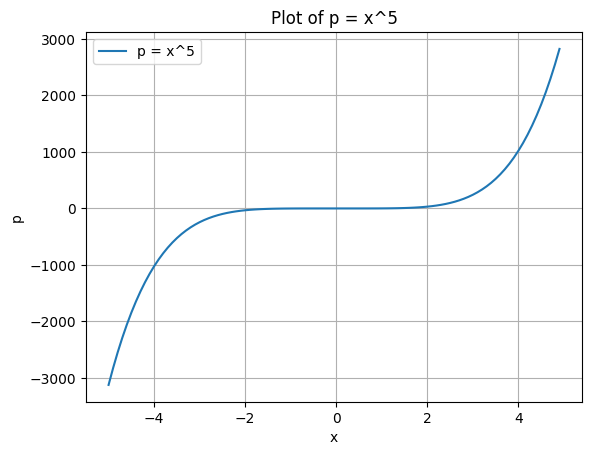

In [8]:
import math

k = 5
x = np.arange(-5, 5, 0.1)
p = np.power(x, k)

# Plotting the function p
plt.plot(x, p, label='p = x^5')
plt.title('Plot of p = x^5')
plt.xlabel('x')
plt.ylabel('p')
plt.legend(['$k=5$'])
plt.legend()
plt.grid()
plt.show()

# Bonus Task

Create a program, that plots the [Sierpisnki triangle](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle) and/or the [Barnsley Fern](https://en.wikipedia.org/wiki/Barnsley_fern). 

The plot should have no axes, the color and the number of the iterations should be the only arguments:

```python
def sierpinski(color, nr_iter):
    # your code
    pass

sierpinski('red', 1000)
```

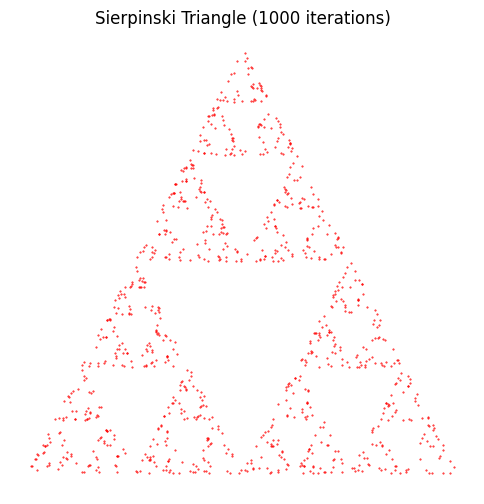

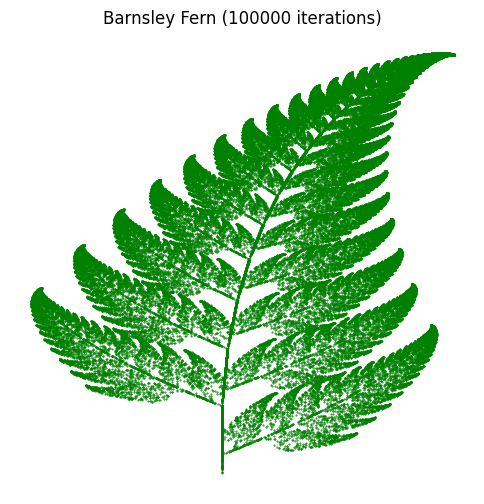

In [10]:
#%% Sierpinski
def sierpinski(color, nr_iter):
    # Plots the Sierpinski triangle
    vertices = np.array([[0, 0], [0.5, np.sqrt(3)/2], [1, 0]])
    p = np.random.rand(2)
    x_points = []
    y_points = []
    for _ in range(nr_iter):
        v = vertices[np.random.randint(0, 3)]
        p = (p + v) / 2
        x_points.append(p[0])
        y_points.append(p[1])
    plt.figure(figsize=(6,6))
    plt.scatter(x_points, y_points, s=0.2, color=color)
    plt.axis('off')
    plt.title(f'Sierpinski Triangle ({nr_iter} iterations)')
    plt.show()
    pass

sierpinski('red', 1000)


#%% Barnsley fern
def Barnsley_fern(color, nr_iter):
    # Plots the Barnsley fern
    plt.figure(figsize=(6,6))
    x = np.zeros(nr_iter)
    y = np.zeros(nr_iter)
    for i in range(1, nr_iter):
        r = np.random.rand()
        if r < 0.01:
            x[i] = 0
            y[i] = 0.16 * y[i-1]
        elif r < 0.86:
            x[i] = 0.85 * x[i-1] + 0.04 * y[i-1]
            y[i] = -0.04 * x[i-1] + 0.85 * y[i-1] + 1.6
        elif r < 0.93:
            x[i] = 0.2 * x[i-1] - 0.26 * y[i-1]
            y[i] = 0.23 * x[i-1] + 0.22 * y[i-1] + 1.6
        else:
            x[i] = -0.15 * x[i-1] + 0.28 * y[i-1]
            y[i] = 0.26 * x[i-1] + 0.24 * y[i-1] + 0.44
    plt.scatter(x, y, s=0.2, color=color)
    plt.axis('off')
    plt.title(f'Barnsley Fern ({nr_iter} iterations)')
    plt.show()

Barnsley_fern('green', 100000)

# Task 3

Write a function `my_surface_plotter(f, x, y, option)` where $f$ is a function object $f(x,y)$. The function `my_surface_plotter` should produce a 3D surface plot of $f(x,y)$ using `plot_surface` if option is the string `‘surface’`. It should produce a contour plot of $f(x,y)$ if the option is the string `‘contour’`. Assume that x and y are one-dimensional arrays or lists. Remember to give the plot axis labels and title optionally.

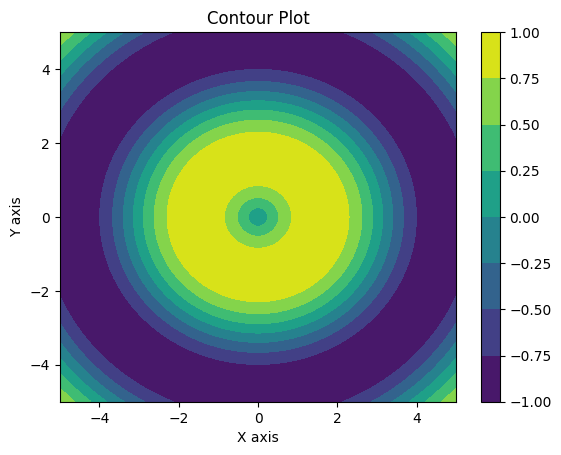

In [ ]:
def my_surface_plotter(f: Callable[[np.ndarray, np.ndarray], np.ndarray], x: np.ndarray, y: np.ndarray, option: Literal["surface", "contour"]):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure()
    if option == 'surface':
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis')
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        plt.title('3D Surface Plot')
        fig.colorbar(surf, ax=ax, shrink=0.5)
    elif option == 'contour':
        cp = plt.contourf(X, Y, Z, cmap='viridis')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.title('Contour Plot')
        plt.colorbar(cp)
    else:
        raise ValueError("Option must be 'surface' or 'contour'.")
    plt.show()

f = lambda x, y: np.sin(np.sqrt(x**2 + y**2))
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
my_surface_plotter(f, x, y, "surface")

# Homework

Choose a fractal of your liking (eg. Julia, Mandelbrot set, Lorenz Attractor, Bransley fern, Feigenbaum attractor etc.)

**Note** ⚠️: If you are to choose an attractor, look up the map associated to it. These are discrete maps usually (eg. logistic map)

1. Write a code, that generates the fractal. Try to vectorize and use numpy as much as possible. Big iteration numbers may take a lot of time.
2. Visualize the results. Plot the time series of `X` for one parameter, and the parameter phase space. (There will be an extra parameter, let's name `R`, that has to be changed. Plot `X` against `R` to obtain the actual attractor). Note that the time series might not be generated or represented easily for each fractal like structure. If you cant, then don't plot the timeseries, but try to come up with some visualization for that as well.
3. Plot the fractal. Style the axes, give colorbar, if you can, change the colors, such the figure is appealing (don't leave default color settings as it will result in less points).
4. Create an inset figure, that will zoom in to a specific location of the fractal, showcasing, that if you zoom in, indeed a similar pattern can be seen!

In [ ]:
%pip install ipywidgets --quiet

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from ipywidgets import interact

# Lorenz Attractor
def generate_data(nr_iter: int, dt: float) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    x = np.zeros(nr_iter)
    y = np.zeros(nr_iter)
    z = np.zeros(nr_iter)

    # Initial conditions
    x[0], y[0], z[0] = 0, 1, 1.05

    for i in range(1, nr_iter):
        x[i] = x[i-1] + dt * (10 * (y[i-1] - x[i-1]))
        y[i] = y[i-1] + dt * (28 * x[i-1] - y[i-1] - x[i-1] * z[i-1])
        z[i] = z[i-1] + dt * (x[i-1] * y[i-1] - (8/3) * z[i-1])

    return x, y, z


def graph_lorenz_attractor(color: str, X: int, R: float):
    # Precompute trajectory
    x, y, z = generate_data(X, R)

    # Interactive plotting function
    def update(step=1000, zoom=50):
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x[:step], y[:step], z[:step], color=color, lw=0.7)

        # Apply zoom by shrinking axis limits
        ax.set_xlim(-zoom, zoom)
        ax.set_ylim(-zoom, zoom)
        ax.set_zlim(0, zoom * 2)  # attractor is mostly positive Z

        ax.set_title(f"Lorenz Attractor (dt={R}, steps={step}/{X}, zoom={zoom})")
        ax.set_xlabel("X axis")
        ax.set_ylabel("Y axis")
        ax.set_zlabel("Z axis")

        plt.show()

    # Sliders: step & zoom
    interact(update, step=(1, X, 100), zoom=(10, 80, 5))


# Example run
graph_lorenz_attractor("blue", 10000, 0.01)


interactive(children=(IntSlider(value=1000, description='step', max=10000, min=1, step=100), IntSlider(value=5…